# Big Mart Sales Prediction using Machine Learning

## Project Overview
This notebook uses machine learning to predict product sales at Big Mart outlets. The goal is to help with inventory management and business planning by analyzing past sales data.

## Dataset
The dataset includes information on products, stores, and historical sales. Key features include product ID, weight, price, type, store ID, location, and outlet type.

## Approach
- Data cleaning and preprocessing
- Feature encoding
- Model building (Linear Regression, Decision Tree, Random Forest, etc.)
- Model evaluation using RMSE and R²
- Insights through visualization

## Outcome
A model that predicts sales and provides actionable insights for retail decisions.

In [1]:
# Loading the depedencies:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import  train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('train.csv')

print(data.head(2))
print('-'*100)
print(data.info())
print('-'*100)
print(data.describe())
print('-'*100)
print(data.isnull().sum()) # Null Values Found in 'Item_Weight' and 'Outlet_Size' columns
print('-'*100)
print(data.duplicated().sum())
print('-'*100)
print(data.shape)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier          

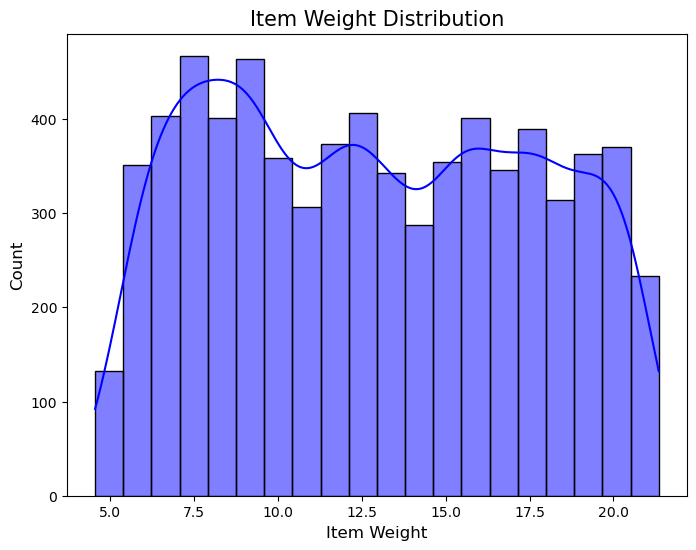

Skewness of Item_Weight: 0.0824262091221237


In [3]:
# Exploratory Data Analysis for missing values in 'Item_Weight' column

plt.figure(figsize = (8, 6))
sns.histplot(data= data , x = 'Item_Weight', kde = True, color = 'blue')
plt.title('Item Weight Distribution', fontsize = 15)
plt.xlabel('Item Weight', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

print(
    "Skewness of Item_Weight:", data["Item_Weight"].skew()
)  # This means Item_Weight is approximately symmetric — it's not skewed. We can use mean to fill the missing values.

In [4]:
# Dealing with missing values in 'Item_Weight' column:

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data.isnull().sum() # Null Values in 'Item_Weight' column are filled

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Dealing with missing values in 'outlet_size' column:

# Create the mode mapping
mode_of_outlet_type = data.pivot_table(
    values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0])
)
mode_of_outlet_type = mode_of_outlet_type.T  # transpose to make Outlet_Type the index

# Find missing values
missing_values = data["Outlet_Size"].isnull()

# Fill missing values using the mode mapping
data.loc[missing_values, "Outlet_Size"] = data.loc[missing_values, "Outlet_Type"].map(
    mode_of_outlet_type["Outlet_Size"]
)

# Verify that missing values are filled
print(data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


# Visualization for Numerical Features:

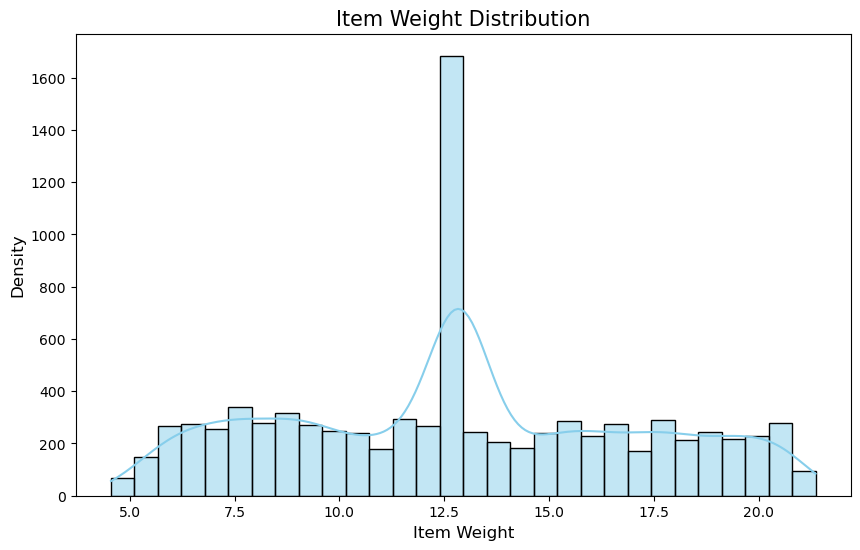

In [6]:
# Item_Weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["Item_Weight"], kde=True, color="skyblue", bins=30)
plt.title("Item Weight Distribution", fontsize=15)
plt.xlabel("Item Weight", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

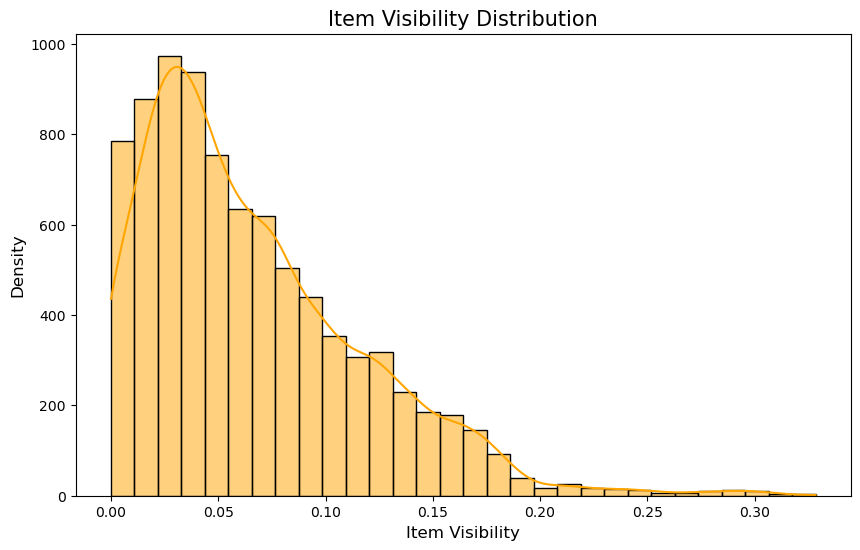

In [7]:
# Item_Visibility Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["Item_Visibility"], kde=True, color="orange", bins=30)
plt.title("Item Visibility Distribution", fontsize=15)
plt.xlabel("Item Visibility", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

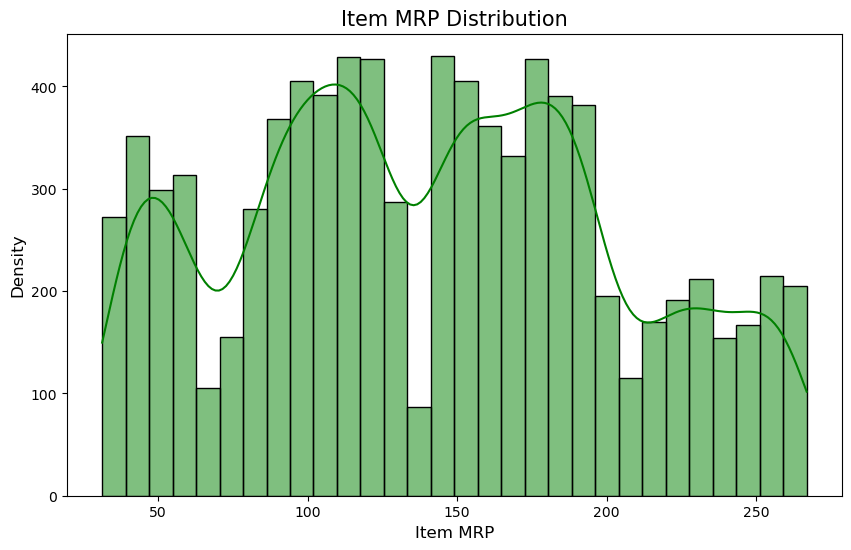

In [8]:
# Item_MRP Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["Item_MRP"], kde=True, color="green", bins=30)
plt.title("Item MRP Distribution", fontsize=15)
plt.xlabel("Item MRP", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

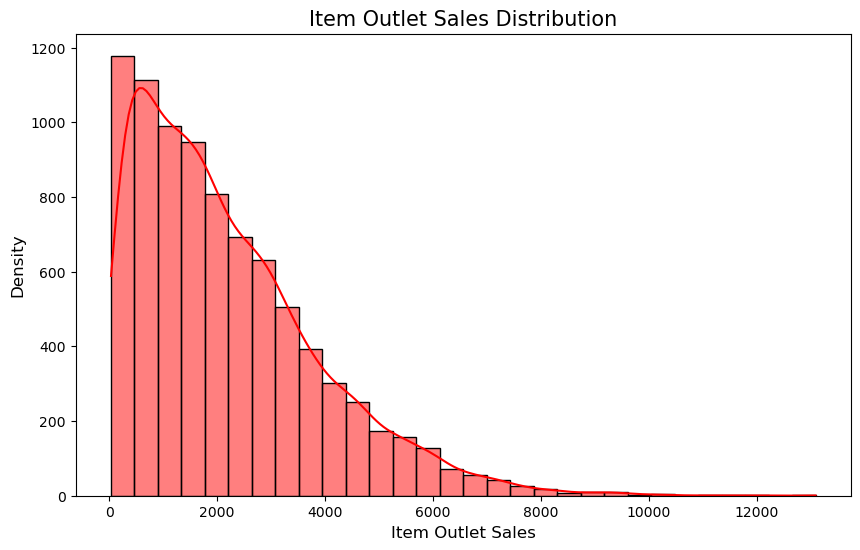

In [9]:
# Item_Outlet_Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["Item_Outlet_Sales"], kde=True, color="red", bins=30)
plt.title("Item Outlet Sales Distribution", fontsize=15)
plt.xlabel("Item Outlet Sales", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

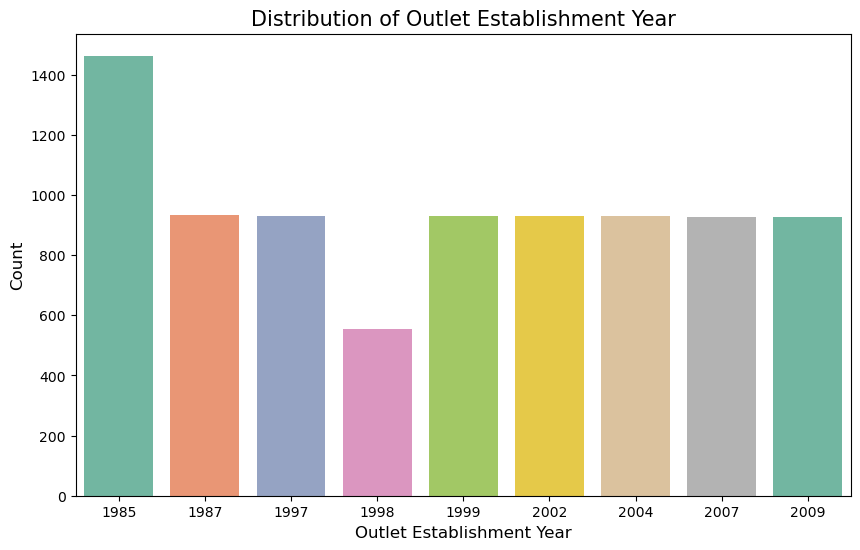

In [10]:
# Countplot for Outlet_Establishment_Year
plt.figure(figsize=(10, 6))
sns.countplot(x="Outlet_Establishment_Year", data=data, palette="Set2")
plt.title("Distribution of Outlet Establishment Year", fontsize=15)
plt.xlabel("Outlet Establishment Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Visualizations for Categorical Features:


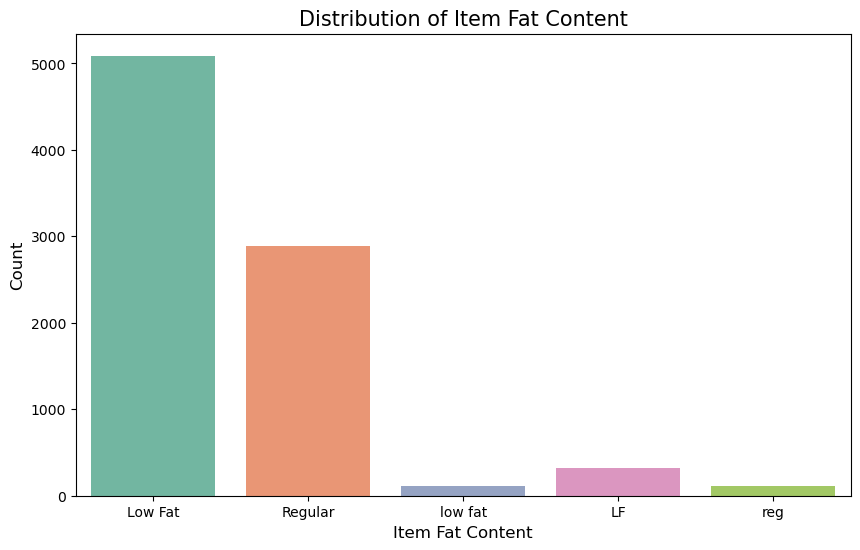

In [11]:
# Countplot for Item_Fat_Content:

plt.figure(figsize=(10, 6))
sns.countplot(x="Item_Fat_Content", data=data, palette="Set2")
plt.title("Distribution of Item Fat Content", fontsize=15)
plt.xlabel("Item Fat Content", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show() # We can see that there are some inconsistencies in the 'Item_Fat_Content' column. We will fix them.

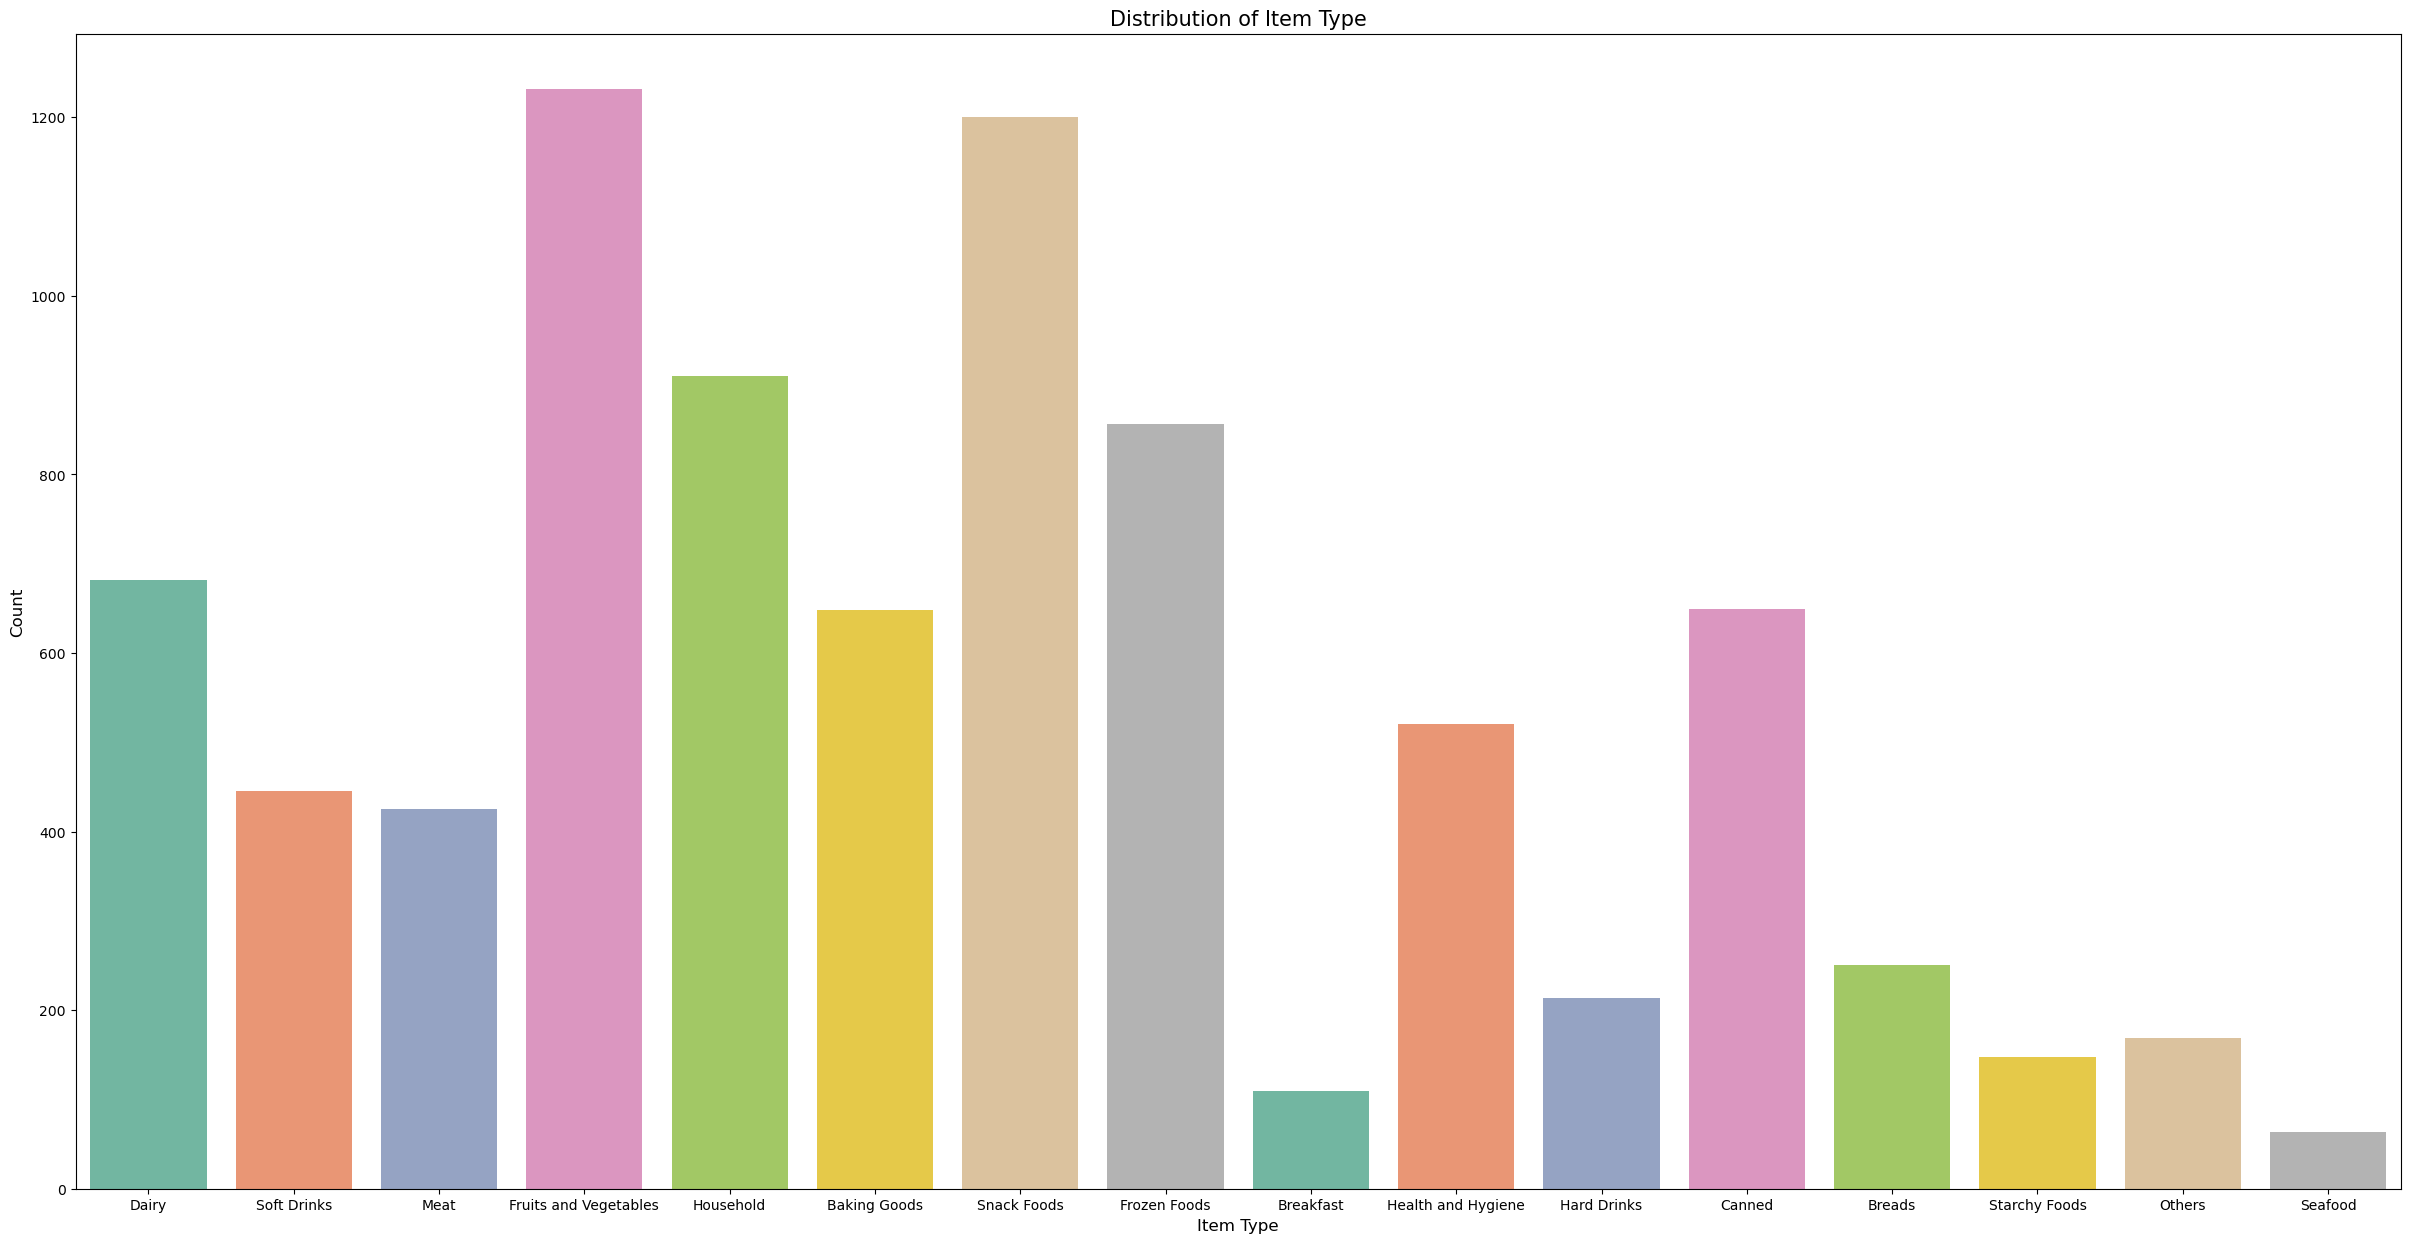

In [12]:
# countplot for Item_Type:

plt.figure(figsize=(30, 15))
sns.countplot(x="Item_Type", data=data, palette="Set2")
plt.title("Distribution of Item Type", fontsize=15)
plt.xlabel("Item Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

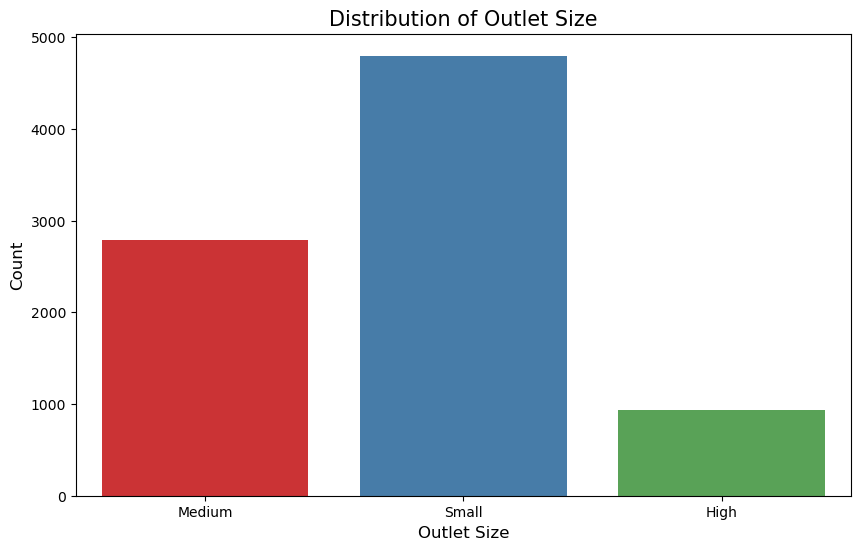

In [13]:
# Countplot for Outlet_Size:

plt.figure(figsize=(10, 6))
sns.countplot(x="Outlet_Size", data=data, palette="Set1")
plt.title("Distribution of Outlet Size", fontsize=15)
plt.xlabel("Outlet Size", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

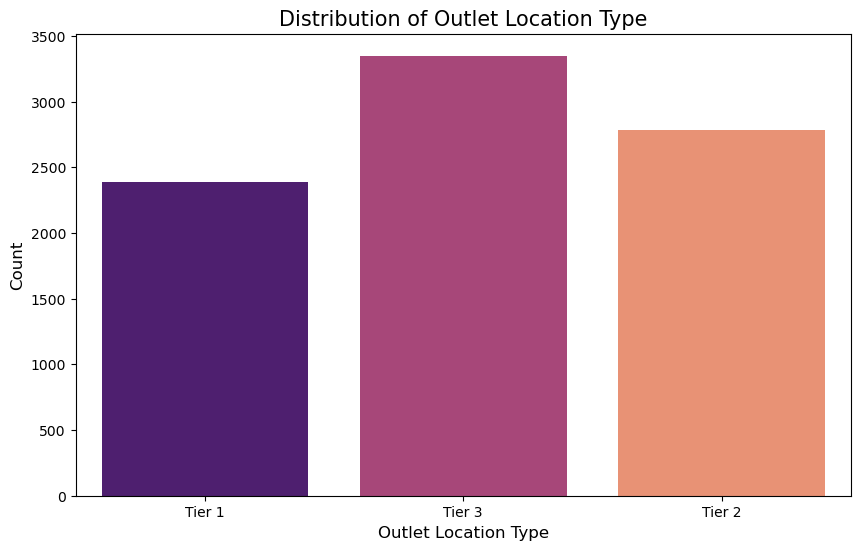

In [14]:
# Countplot for Outlet_Location_Type:

plt.figure(figsize=(10, 6))
sns.countplot(x="Outlet_Location_Type", data=data, palette="magma")
plt.title("Distribution of Outlet Location Type", fontsize=15)
plt.xlabel("Outlet Location Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Data Preprocessing:

In [15]:
# Handling Inconsistencies in 'Item_Fat_Content' column:

data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [16]:
data.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}}, inplace=True) 
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [17]:
# Label Encoding for categorical columns:

le = LabelEncoder()
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [18]:
# Label Encoding for categorical columns:

le = LabelEncoder()
data['Item_Identifier'] = le.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = le.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])

In [19]:
print(data.head())

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            2   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0         

In [20]:
# Splitting the data into features and target:

X = data.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier'], axis = 1)
y = data['Item_Outlet_Sales']
print(X.head())
print('-'*100)
print(y.head())

   Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0         0.016047          4  249.8092   
1         5.92                 1         0.019278         14   48.2692   
2        17.50                 0         0.016760         10  141.6180   
3        19.20                 1         0.000000          6  182.0950   
4         8.93                 0         0.000000          9   53.8614   

   Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                  9                       1999            1   
1                  3                       2009            1   
2                  9                       1999            1   
3                  0                       1998            2   
4                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  
0                     0            1  
1                     2            2  
2                     0            1  
3             

In [21]:
# Train-Test Split:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(X.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(8523, 10) (6818, 10) (1705, 10) (6818,) (1705,)


In [22]:
# Training and Evaluating the XGBRegressor:

model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("-" * 100)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("-" * 100)
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  858.9518132157814
----------------------------------------------------------------------------------------------------
Mean Squared Error:  1495063.4624338732
----------------------------------------------------------------------------------------------------
R2 Score:  0.5157022091607624


In [23]:
# Training and Evaluating the RandomForestRegressor:

model1 = RandomForestRegressor()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("-" * 100)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("-" * 100)
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  827.1951136304986
----------------------------------------------------------------------------------------------------
Mean Squared Error:  1397686.4463975502
----------------------------------------------------------------------------------------------------
R2 Score:  0.5472456686391549


In [24]:
# Traning and Evaluating the DecisionTreeRegressor:

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("-" * 100)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("-" * 100)
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  1078.3905977712611
----------------------------------------------------------------------------------------------------
Mean Squared Error:  2303799.6294138185
----------------------------------------------------------------------------------------------------
R2 Score:  0.2537272837602267
